# Plots of Dimension reduction on Wikipedia data

First we load the libraries and data ... I have saved off the dimension reduction results of the various algorithms.

In [8]:
import datamapplot
import numpy as np
import matplotlib.pyplot as plt

# plt.style.use("mpl_style.txt")
import matplotlib.pyplot as plt
plt.style.use("opinionated_rc")
import colormaps as cmaps
import opinionated

plt.rcParams['savefig.bbox'] = 'tight'

wikipedia_data_map = np.load("../data/Simple-English-Wikipedia/wikipedia_umap_data_map_1.npy")
wikipedia_labels = np.load("../data/Simple-English-Wikipedia/Wikipedia-cluster_labels.npy", allow_pickle=True)
wikipedia_labels_2 = np.load("../data/Simple-English-Wikipedia/wikipedia_azureai_topic_layer_2.npy", allow_pickle=True)

tsne_data_map = np.load("../data/Simple-English-Wikipedia/wikipedia_tsne_data_map_1.npy")
pca_data_map = np.load("../data/Simple-English-Wikipedia/wikipedia_pca_data_map_1.npy")
mds_data_map = np.load("../data/Simple-English-Wikipedia/wikipedia_mds_data_map_1.npy")
le_data_map = np.load("../data/Simple-English-Wikipedia/wikipedia_le_data_map_1.npy")
phate_data_map = np.load("../data/Simple-English-Wikipedia/wikipedia_phate_data_map_1.npy")

We want a consistent palette; here we are essentially reusing internal code in datamapplot to make a palette based on the UMAP embedding.

In [27]:
unique_non_noise_labels = [
    label for label in np.unique(wikipedia_labels) if label != "Unlabelled"
]
cluster_centers = np.asarray([
    wikipedia_data_map[wikipedia_labels == label].mean(axis=0)
    for label in unique_non_noise_labels
])
palette = datamapplot.palette_handling.palette_from_datamap(
    wikipedia_data_map,
    cluster_centers,
    hue_shift=0.0,
    radius_weight_power=1.0,
    min_lightness=15,
)
label_color_map = dict(zip(unique_non_noise_labels, palette))

label_color_map['Unlabelled'] = "#d9d9d9"

We can try out Max's labelling strategy; I have struggled to figure out the quirks in matplotlib that result in this not working when writing to multiple axes, but I'll leave the one off plot here in case you wish the make several plots and then stitch together results in another program.

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_28078/951519755.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(wikipedia_data_map[:,0], wikipedia_data_map[:,1], cmap="tab10")


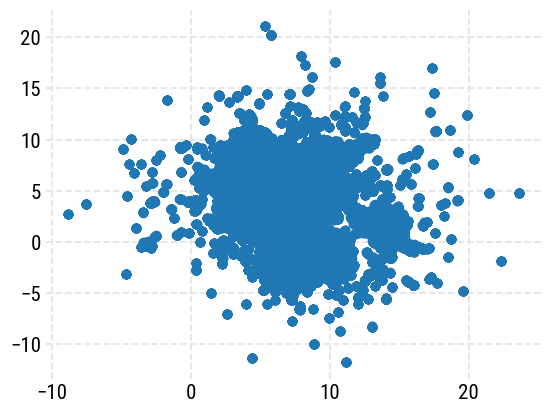

In [28]:
plt.scatter(wikipedia_data_map[:,0], wikipedia_data_map[:,1], cmap="tab10")

In [29]:
label_color_map

{'Aircraft and Spacecraft': '#b0d7e3',
 'American Politicians': '#c86000',
 'Amphibians': '#6d00ff',
 'Astronomy': '#95005d',
 'Atlantic Tropical Storms and Hurricanes': '#95000f',
 'Biographies in Arts, Literature and Journalism': '#a8c071',
 'Biographies of Actors and Actresses': '#6e8000',
 'Biographies of Athletes and Sportspeople': '#16b886',
 'Biographies of Celebrities': '#daaa5e',
 'Biographies of Politicians': '#e8a46b',
 'Biographies of Scientists and Mathematicians': '#d2bf77',
 'Biographies of Soccer Players': '#008a5e',
 'Biology and Molecular Biology': '#a630d2',
 'British and French Royal Families': '#a4d2a0',
 'Census Details': '#2e5df2',
 'Chemistry': '#b010af',
 'Cities and Towns in France': '#0064c8',
 'Cities and Towns in Germany': '#8bb9e9',
 'Classical Music': '#77ab46',
 'Conflict and War': '#bbdab2',
 'Countries of the World': '#a1b3ef',
 'Deaths of Famous People': '#aa5700',
 'Educational Institutions': '#42b8cf',
 'Food and Cooking': '#c99fe8',
 'Global Geogra

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment


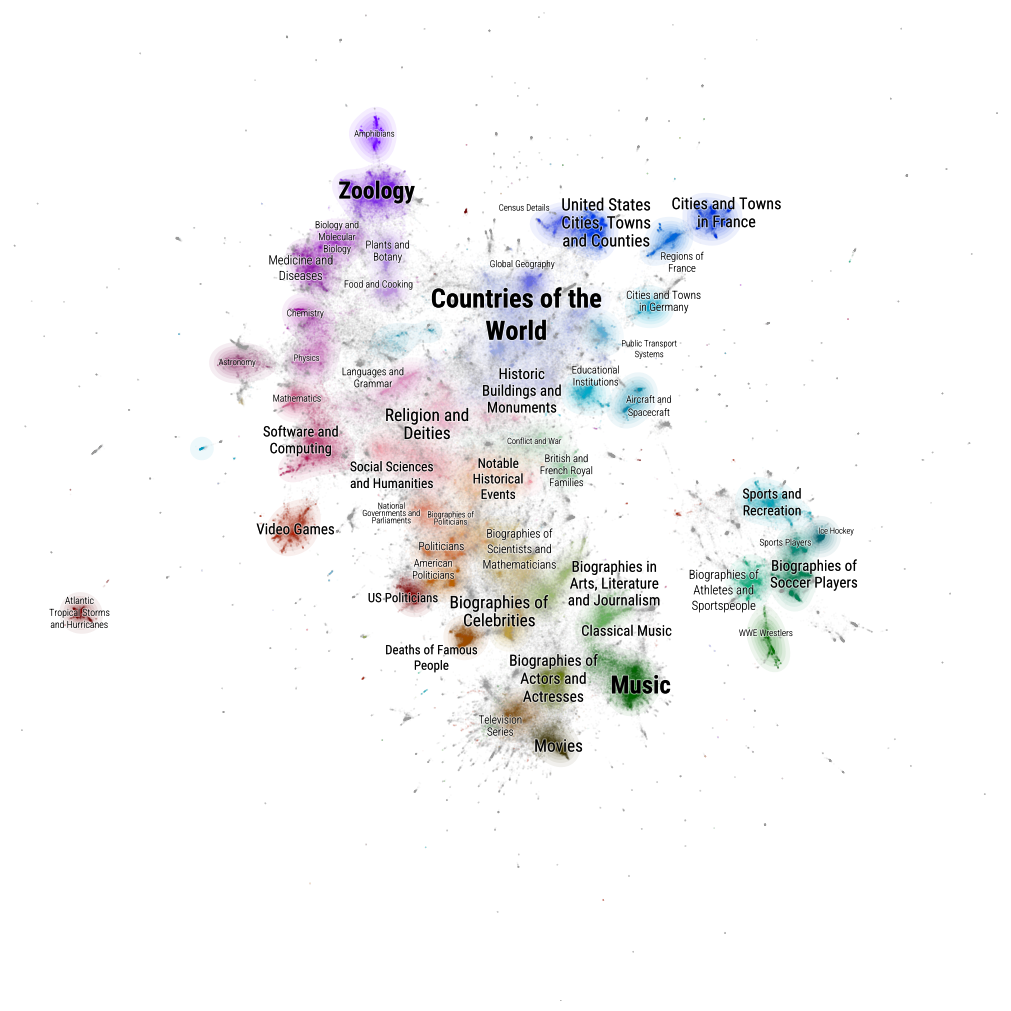

In [35]:
fig, ax = datamapplot.create_plot(
    wikipedia_data_map,
    wikipedia_labels,
    use_medoids=True,
    font_family="Roboto Condensed",
    point_size=1.3,
    label_linespacing=1.25,

    color_label_text=False,
    force_matplotlib=True,

    label_over_points=True,
    dynamic_label_size=True,
    # min_fontsize=8, # These somehow dont work for me?
    # max_font_size=100,
    label_font_stroke_width=1.5 
)

# Increase all label text sizes by 50%
for txt in ax.texts:
    txt.set_fontsize(txt.get_fontsize() * 1.5)

# set axis limits to the data bounds 
# Not sure whether we want this, we are cutting off a hand full of noise points by zooming in.
ax.set_xlim(-5,20)
ax.set_ylim(-10,15)
fig.set_frameon(False)
fig.savefig("../figures/umap_pca-init_wikipedia_map.png", dpi=600, facecolor="white")

Lastly we'll generate the plot in the layout that Dmitry suggested.

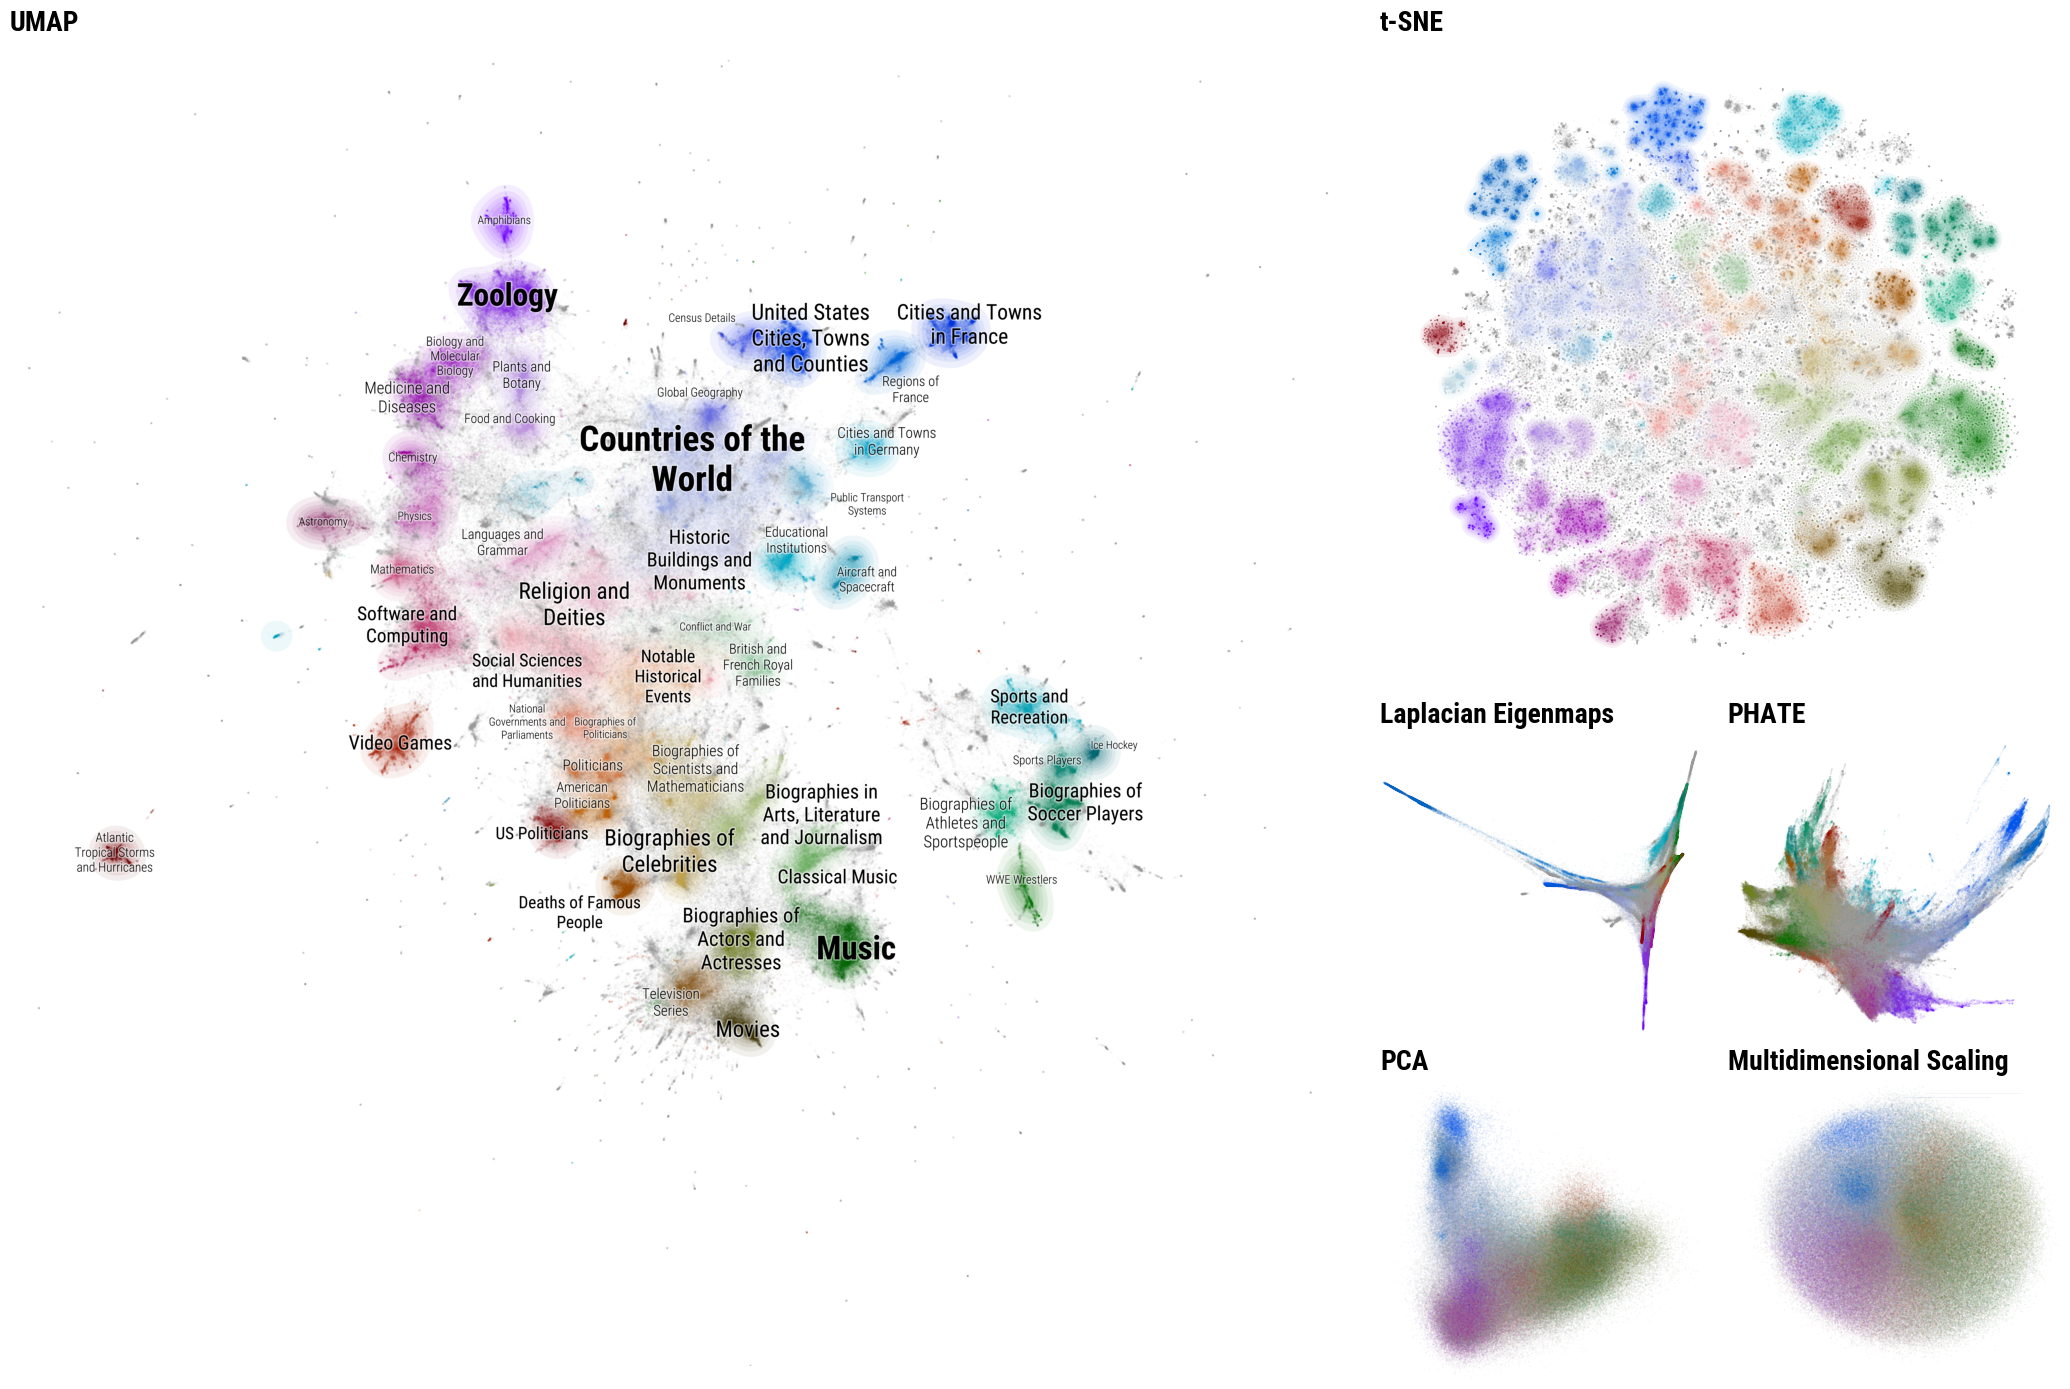

In [ ]:


fig, ax_dict = plt.subplot_mosaic(
'''
AAAABB
AAAABB
AAAACD
AAAAEF
''',
figsize=(21,14),
dpi=100,
)
# Replace UMAP plot with the static image
img = plt.imread("../figures/umap_pca-init_wikipedia_map.png")
ax_dict["A"].imshow(img)
ax_dict["A"].axis("off")
ax_dict["A"].set_title("UMAP", fontfamily="Roboto Condensed", fontsize=20, pad=10)
ax_dict["B"].set_title("t-SNE", fontfamily="Roboto Condensed", fontsize=20, pad=10)
ax_dict["D"].set_title("PHATE", fontfamily="Roboto Condensed", fontsize=20, pad=10)
ax_dict["C"].set_title("Laplacian Eigenmaps", fontfamily="Roboto Condensed", fontsize=20, pad=10)
ax_dict["E"].set_title("PCA", fontfamily="Roboto Condensed", fontsize=20, pad=10)
ax_dict["F"].set_title("Multidimensional Scaling", fontfamily="Roboto Condensed", fontsize=20, pad=10)

fig_, ax = datamapplot.create_plot(
    tsne_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    # sub_title="t-SNE",
    font_family="Roboto Condensed",
    sub_title_keywords={"fontsize":16},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":2.5},
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#00000000",
    label_base_radius=0.0,
    force_matplotlib=True,
    point_size=1.3,
    ax=ax_dict["B"],
)
fig_, ax = datamapplot.create_plot(
    le_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    # sub_title="Laplacian Eigenmaps",
    font_family="Roboto Condensed",
    sub_title_keywords={"fontsize":12},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":1e-6},
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#00000000",
    label_base_radius=0.0,
    force_matplotlib=True,
    point_size=1.3,
    ax=ax_dict["C"],
)
fig_, ax = datamapplot.create_plot(
    2000 * phate_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    # sub_title="PHATE",
    font_family="Roboto Condensed",
    sub_title_keywords={"fontsize":12},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":0.3},
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#00000000",
    label_base_radius=0.0,
    force_matplotlib=True,
    point_size=1.3,
    ax=ax_dict["D"],
)
fig_, ax = datamapplot.create_plot(
    pca_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    # sub_title="Principal Component Analysis",
    font_family="Roboto Condensed",
    sub_title_keywords={"fontsize":12},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":1e-3},
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#00000000",
    label_base_radius=0.0,
    force_matplotlib=True,
    point_size=1.3,
    ax=ax_dict["E"],
)
fig_, ax = datamapplot.create_plot(
    mds_data_map.astype(np.float32),
    wikipedia_labels,
    arrowprops={"alpha":0.0},
    # sub_title="Multidimensional Scaling",
    font_family="Roboto Condensed",
    sub_title_keywords={"fontsize":12},
    add_glow=True,
    glow_keywords={"kernel_bandwidth":1e-3},
    label_color_map=label_color_map,
    label_font_size=0,
    color_label_text="#00000000",
    label_base_radius=0.0,
    force_matplotlib=True,
    point_size=1.3,
    ax=ax_dict["F"],
)
plt.tight_layout()
fig.savefig("../figures/wikipedia_figure.png", dpi=400, facecolor="white")

# todo 

* UMAP-x/y markers?
* zooming in ok?
* increase umap label size in datamapplot doesnt work for some reason.

